In [45]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('../dataset/')
from dataset import AsbestosDataSet
import os 
from pathlib import Path
from PIL import Image
import albumentations as A
import cv2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
image_dir = '../../task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/JPEGImages/asbestos/stones/161220'
mask_dir  = '../../task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/SegmentationAsbest'
dataset = AsbestosDataSet(image_dir, mask_dir)

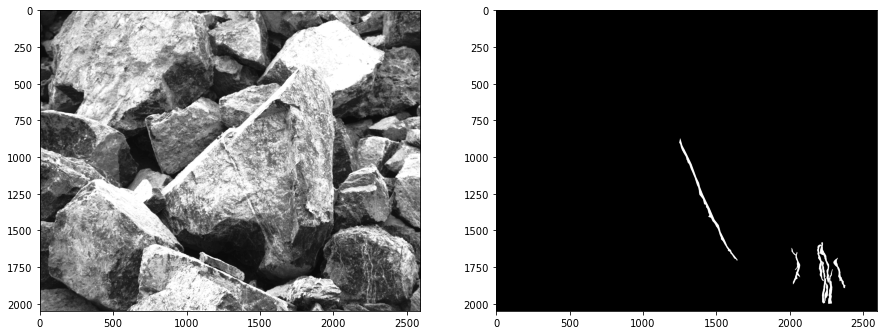

In [11]:
example = dataset[15]
image = example['image']
mask  = example['mask']

fig, ax = plt.subplots(1,2, figsize=(15,15), )
ax[0].imshow(image,cmap = 'Greys_r')
ax[1].imshow(mask, cmap = 'Greys_r')

In [5]:
t_h = 711
transform = A.Compose([A.RandomCrop(width=512*3, height=512*3), A.Resize(t_h,t_h), A.RandomRotate90()])

In [8]:
transform(image = dataset[0]['image'])

{'image': array([[0.7324165 , 0.81451946, 0.86717564, ..., 0.87766254, 0.82551175,
         0.8327933 ],
        [0.7806463 , 0.8093116 , 0.85494006, ..., 0.8502113 , 0.7766244 ,
         0.79268044],
        [0.7449255 , 0.81772643, 0.7882826 , ..., 0.761984  , 0.71391755,
         0.7812995 ],
        ...,
        [0.30703458, 0.33704337, 0.36396676, ..., 0.7882895 , 0.79693365,
         0.7875254 ],
        [0.33280522, 0.34785792, 0.36513284, ..., 0.61361796, 0.7250475 ,
         0.73023176],
        [0.3045624 , 0.34439713, 0.36860323, ..., 0.6251615 , 0.60678715,
         0.6021984 ]], dtype=float32)}

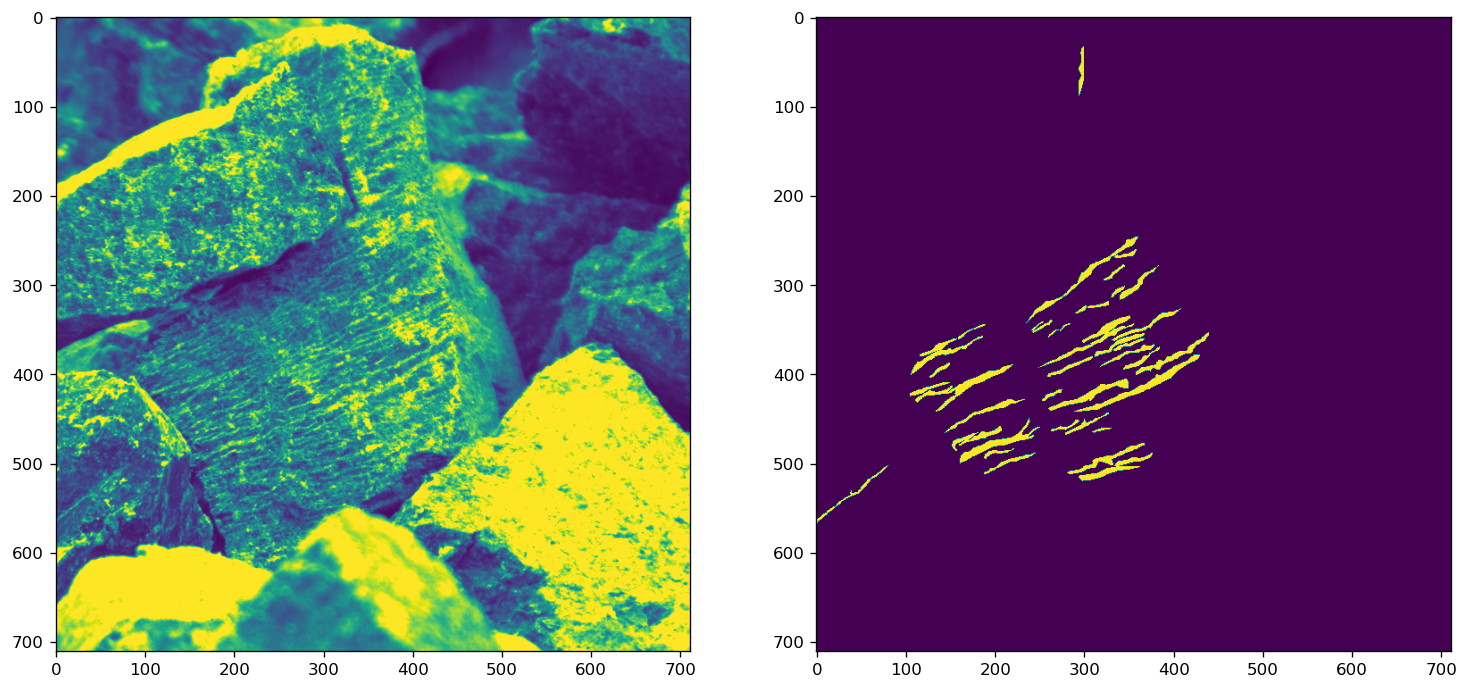

In [28]:
for i in range(2):
    example = dataset[i]
    image = example['image']
    mask  = example['mask']
    transformed = transform(image=np.array(image), mask=np.array(mask))
    transformed_image = transformed['image']
    transformed_mask = transformed['mask']
fig, ax = plt.subplots(1,2, figsize=(15,15), dpi = 120 )
ax[0].imshow(transformed_image)
ax[1].imshow(transformed_mask)

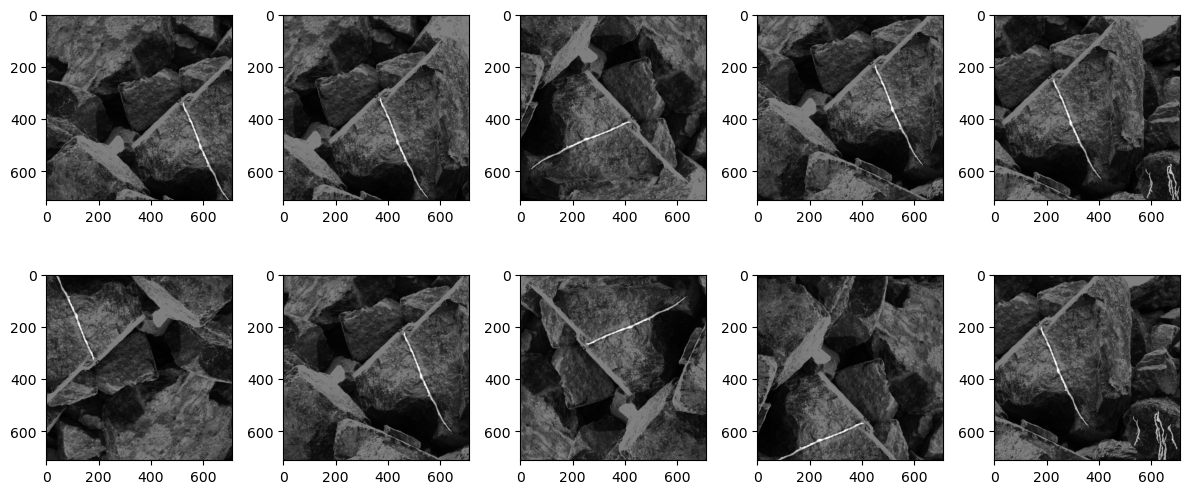

In [33]:
image = example['image']
mask  = example['mask']
fig, axis = plt.subplots(2,5, dpi = 100, figsize=(12,6))
j = 0
for i in range(10):
    transformed = transform(image=np.array(image), mask=np.array(mask))
    transformed_image = transformed['image']
    transformed_mask = transformed['mask']
    if i < 5:
        axis[0,i].imshow(transformed_image,cmap='gray',)
        axis[0,i].imshow(transformed_mask, alpha = 0.5, cmap='gray',)
    else:
        axis[1,i-5].imshow(transformed_image,cmap='gray',)
        axis[1,i-5].imshow(transformed_mask, alpha = 0.5, cmap='gray',)
    j+=1
    fig.tight_layout()

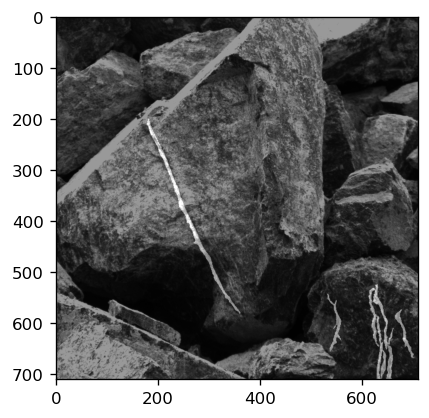

In [37]:
fig = plt.figure(dpi = 120)

plt.imshow(transformed_image, cmap='gray')
plt.imshow(transformed_mask, alpha = 0.4, cmap='gray',)

In [35]:
trans_set = AsbestosDataSet(image_dir, mask_dir, transform)

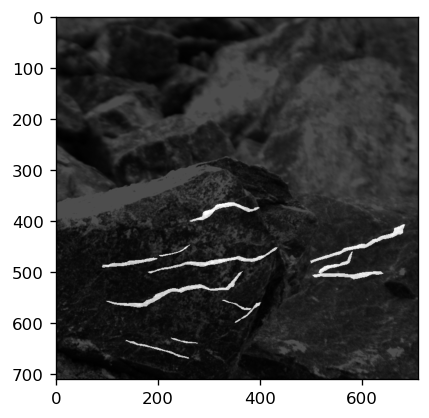

In [36]:
t = trans_set[26]
fig = plt.figure(dpi = 120)
plt.imshow(t['image'], cmap='gray')
plt.imshow(t['mask'], alpha = 0.7, cmap='gray',)

In [7]:
image_dir = '../../task_asbestos_stone_lab_common_camera-2021_12_10_13_12_14-mots png 1.0/images/asbestos/stones/lab_common_camera/'
mask_dir  = '../../task_asbestos_stone_lab_common_camera-2021_12_10_13_12_14-mots png 1.0/SegmentationAsbest'
dataset = AsbestosDataSet(image_dir, mask_dir)

Number of images and masks are different


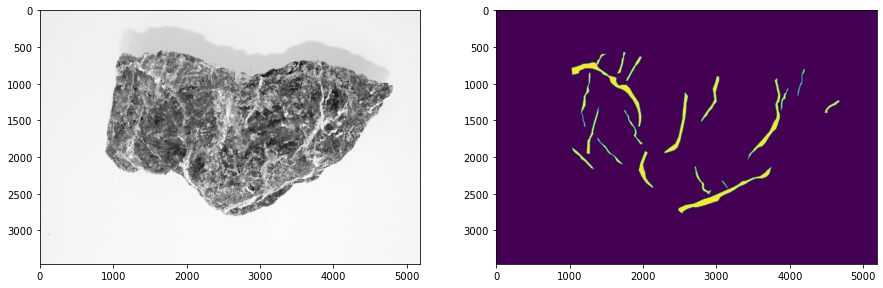

In [8]:
example = dataset[32]
image = example['image']
mask  = example['mask']
fig, ax = plt.subplots(1,2, figsize=(15,15), )
ax[0].imshow(image,cmap = 'Greys_r')
ax[1].imshow(mask)

In [9]:
import gc
gc.collect()

23

In [10]:
np.array(image.shape)//3

array([1152, 1728])

In [11]:
transform = A.Compose([A.RandomCrop(1024,1024), A.RandomRotate90()])
transform = A.Compose([A.Resize(1152, 1728), A.RandomCrop(1024,1024), A.Resize(512,512) ,A.RandomRotate90()])
# transform = A.Compose([A.Resize(1728,2592), A.RandomCrop(640,640), A.RandomRotate90()])

IMG_2708.png
(512, 512)


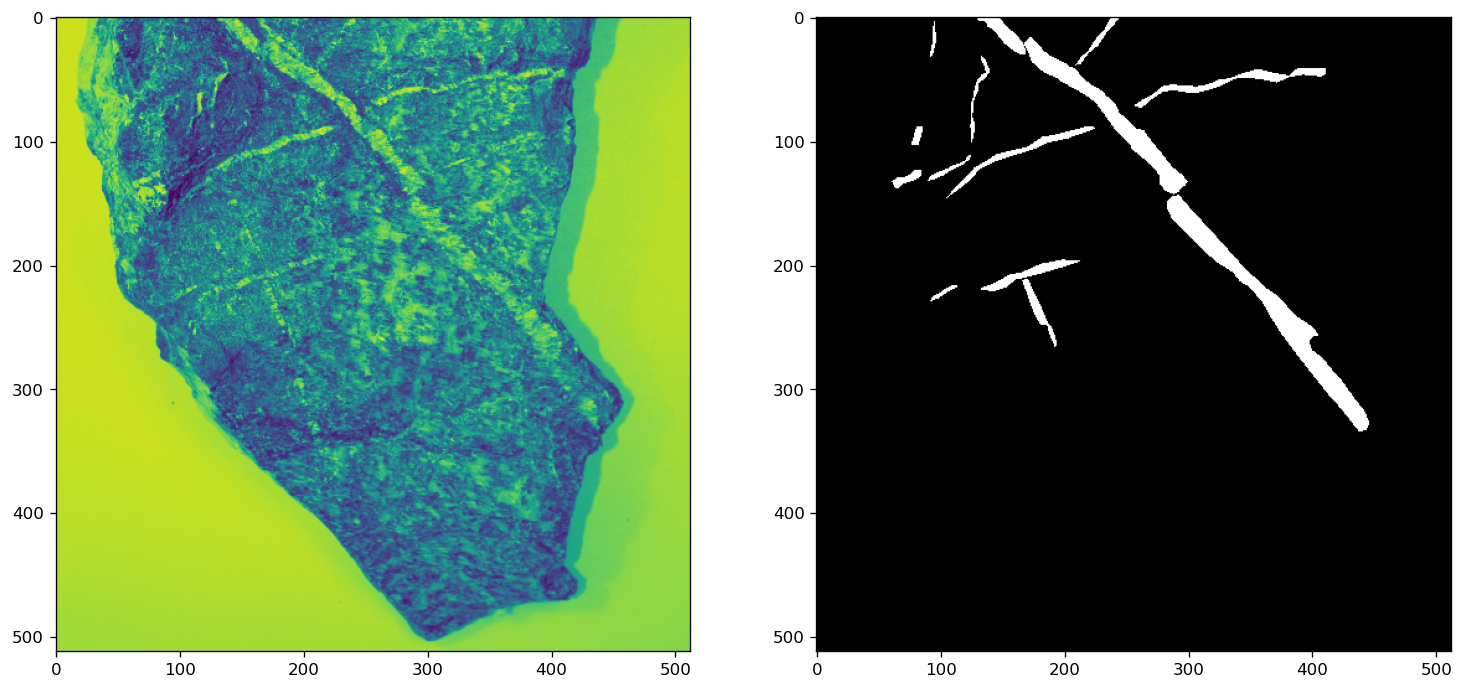

In [12]:
example = dataset[15]
image = example['image']
mask  = example['mask']
print(example['path'])
transformed = transform(image=np.array(image), mask=np.array(mask))
transformed_image = transformed['image']
transformed_mask = transformed['mask']
fig, ax = plt.subplots(1,2, figsize=(15,15), dpi = 120 )
ax[0].imshow(transformed_image)
ax[1].imshow(transformed_mask, cmap = 'gray')
print(transformed_image.shape)

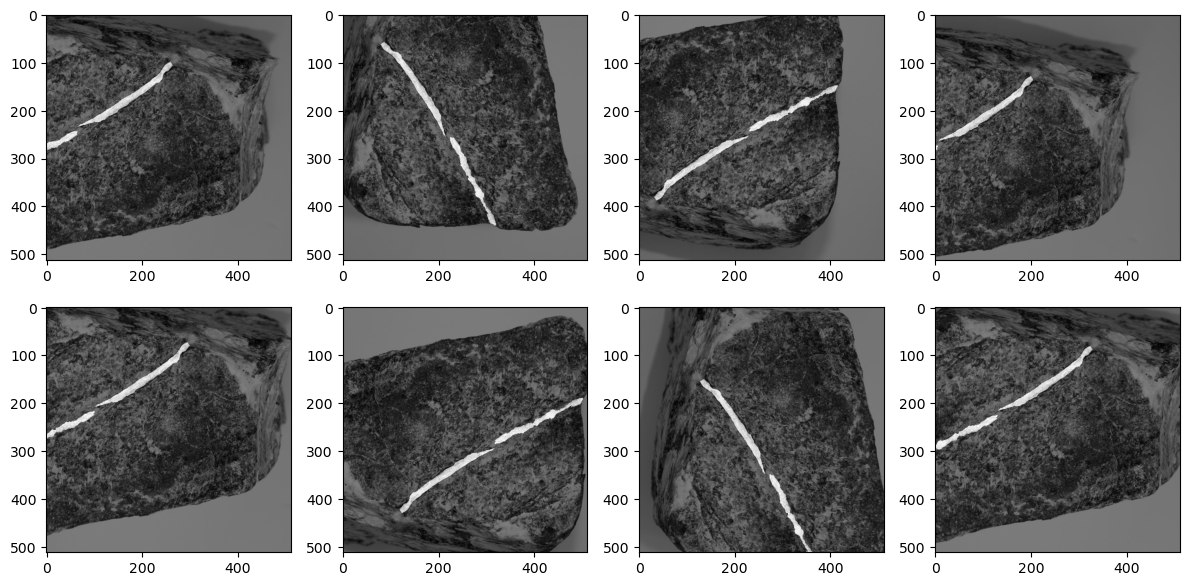

In [15]:
example = dataset[10]
image = example['image']
mask  = example['mask']

n = 4
fig, axis = plt.subplots(2,n, dpi = 100, figsize=(12,6))
j = 0
for i in range(2*n):
    transformed = transform(image=np.array(image), mask=np.array(mask))
    transformed_image = transformed['image']
    transformed_mask = transformed['mask']
    if i < n:
        axis[0,i].imshow(transformed_image,cmap='gray',)
        axis[0,i].imshow(transformed_mask, alpha = 0.5, cmap='gray',)
    else:
        axis[1,i-n].imshow(transformed_image,cmap='gray',)
        axis[1,i-n].imshow(transformed_mask, alpha = 0.5, cmap='gray',)
    j+=1
fig.tight_layout()

In [12]:
img1 = Image.fromarray((255*image[:,:,:3]).astype(np.uint8)).convert('L')

In [15]:
np.array(img1).shape

(3456, 5184)

In [85]:
name = '../../task_asbestos_stone_lab_common_camera-2021_12_10_13_12_14-mots png 1.0/images/asbestos/stones/lab_common_camera/IMG_2688.png'
image = np.array(Image.open(name))
w, h = np.array(image.shape[:2])//3 
w, h

(1152, 1728)

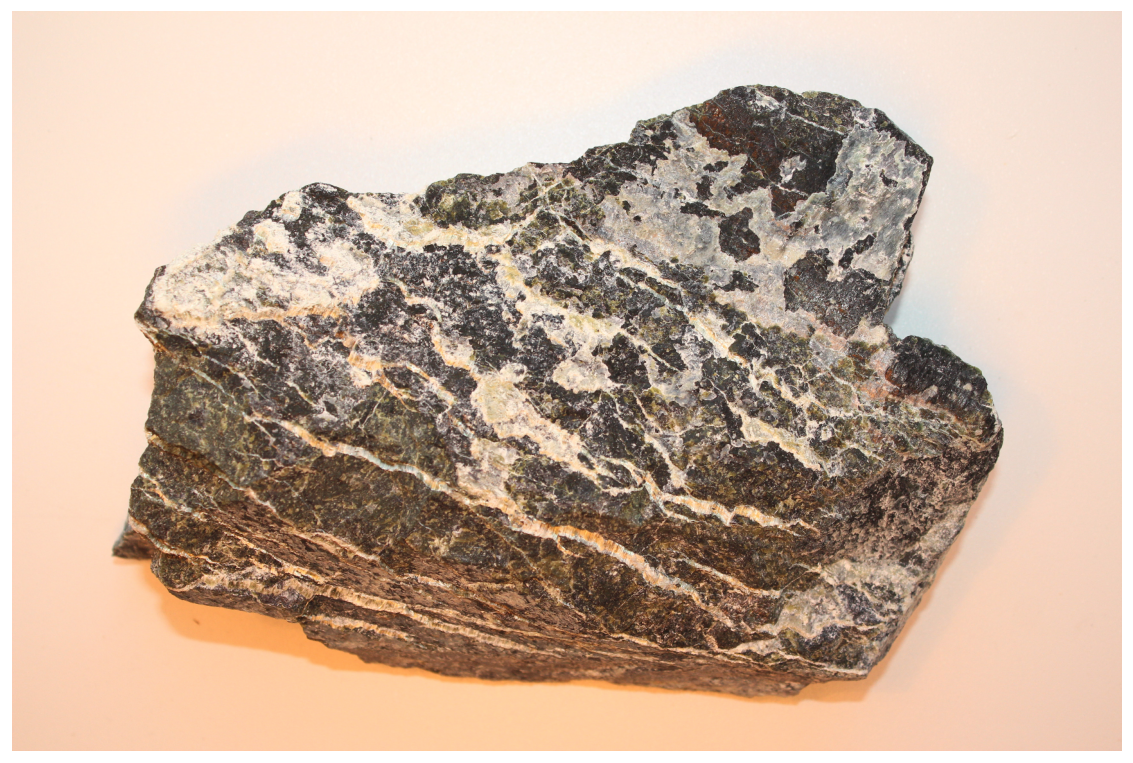

In [88]:
transform = A.Compose([A.Resize(w, h)])
t_image = transform(image=image)['image']
fig = plt.figure(figsize=(10,10), dpi = 120 )
plt.imshow(t_image)
plt.tight_layout()
plt.axis('off')
plt.savefig('./image_files/example_lab_image.png', dpi = 120, bbox_inches='tight')


In [76]:
image_dir = '../../task_asbestos_stone_lab_common_camera-2021_12_10_13_12_14-mots png 1.0/images/asbestos/stones/lab_common_camera/'
mask_dir  = '../../task_asbestos_stone_lab_common_camera-2021_12_10_13_12_14-mots png 1.0/SegmentationAsbest'
set1 = AsbestosDataSet(image_dir, mask_dir)

image_dir = '../../task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/JPEGImages/asbestos/stones/161220'
mask_dir  = '../../task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/SegmentationAsbest'
set2 = AsbestosDataSet(image_dir, mask_dir)

new_set = set1.union(set2)

Number of images and masks are different


In [125]:
Path(mask_dir, files[0])

PosixPath('../../task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/SegmentationAsbest/ManualDetailedImage_11_05_43.bmp')

In [136]:
import glob
from typing import List

def get_files(dirs:List[str]):
    files = []
    for d in dirs:
        for f in os.listdir(d):
            files.append(Path(d,f))
    return files
files = get_files([image_dir, mask_dir])
files[0].name

'ManualDetailedImage_11_05_43.bmp'

In [47]:
def test(image_dirs: List, mask_dirs: List, transforms: List):
    transforms = {d: transformer for d, transformer in zip(image_dirs, transforms)}
    for 

92

In [56]:
for i in new_set:
    print(i['path'], i['image'].shape)

ManualDetailedImage_10_27_18.bmp (2048, 2592)
IMG_2715.png (3456, 5184)
ManualDetailedImage_10_03_35.bmp (3456, 5184)
IMG_2725.png (3456, 5184)
ManualGeneralImage_09_35_25.bmp (3456, 5184)
IMG_2713.png (2048, 2592)
ManualDetailedImage_10_26_43.bmp (2048, 2592)
Full_637437068603828842.bmp (3456, 5184)
Full_637437070174162855.bmp (2048, 2592)
ManualDetailedImage_10_10_10.bmp (3456, 5184)
IMG_2727.png (3456, 5184)
ManualGeneralImage_09_36_44.bmp (2048, 2592)
Full_637437072277634535.bmp (2048, 2592)
Full_637437106803651785.bmp (2048, 2592)
ManualDetailedImage_10_01_52.bmp (3456, 5184)
IMG_2714.png (2048, 2592)
ManualDetailedImage_10_29_22.bmp (3456, 5184)
ManualDetailedImage_10_27_30.bmp (2048, 2592)
ManualDetailedImage_10_05_58.bmp (3456, 5184)
ManualDetailedImage_11_06_02.bmp (2048, 2592)
ManualGeneralImage_09_27_13.bmp (2048, 2592)
IMG_2691.png (3456, 5184)
IMG_2718.png (2048, 2592)
Full_637437074810293632.bmp (2048, 2592)
ManualDetailedImage_11_09_00.bmp (2048, 2592)
ManualDetailedImag